In [9]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..'))) # This can load modules from a different folder
import numpy as np
import WLbackground_cosmic_stds as BG
%matplotlib inline
import pylab as plt
%config InlineBackend.figure_format = 'retina'
from getdist import plots, MCSamples, loadMCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
from IPython.display import display, Math

In [ ]:
BG.fC_LCDM(1000,0.3,0.74,0.0)

In [ ]:
# 6df
z_eff_6df = 0.106
np.savetxt('BAO_data/6df_measurement.txt',[0.336, 0.015], delimiter=' ')
np.savetxt('BAO_data/6df_zeff.txt',[z_eff_6df], delimiter=' ')

In [ ]:
# DR7 MGS:
z_eff_MGS = 0.15
rdH0_o_fV = 1/4.465666824
drdh0_o_fV = 1/4.465666824**2*.1681350461

np.savetxt('BAO_data/DR7_MGS_measurement.txt',[rdH0_o_fV,drdh0_o_fV], delimiter=' ')
np.savetxt('BAO_data/DR7_MGS_zeff.txt',[z_eff_MGS], delimiter=' ')

In [22]:
# For DR12, we used BAO only
#BAO-only consensus results, Alam et al. 2016
#https://arxiv.org/abs/1607.03155
z_eff_dr12 = [0.38, 0.51, 0.61]     # effective redshifts
DM_over_rs_dr12 = np.array([1512.39, 1975.22, 2306.68])     # DM/rd with rd_fid=147.78 
bao_Hz_rs_dr12 = np.array([81.2087, 90.9029, 98.9647])      # H(z)*rd   with rd_fid=147.78 

# covariance matrix of the above
Cov_dr12 = np.loadtxt("/Users/weikanglin/GitHub/CosmoMC/data/DR12/BAO_consensus_covtot_dM_Hz.txt",delimiter=' ')



rs_fid=147.78    # fiducial value of rs_fid
c=299792.458 #km/s   speed of light
# conversion of DM_over_rs
theta_d_dr12 = rs_fid/DM_over_rs_dr12     # transf

# conversion of Hz_rs
delta_z_dr12 = bao_Hz_rs_dr12*rs_fid/c

# putting the observables together, with the order corresponding to the order of the covariance matrix
theta_deltaz_dr12 = np.array([theta_d_dr12[0],delta_z_dr12[0],
                              theta_d_dr12[1],delta_z_dr12[1],
                              theta_d_dr12[2],delta_z_dr12[2]])

# Jacobian matrix:
J = np.diag([-1/1512.39**2, 1/c, -1/1975.22**2, 1/c, -1/2306.68**2, 1/c])*rs_fid

# covariance matrix of theta and delta_z:
C_theta_deltaz_dr12 = np.dot(np.dot(J,Cov_dr12),J)

np.savetxt('DR12_consensus_measurement.txt',theta_deltaz_dr12, delimiter=' ')
np.savetxt('DR12_consensus_C.txt',C_theta_deltaz_dr12, delimiter=' ')
np.savetxt('DR12_consensus_zeff.txt',z_eff_dr12, delimiter=' ')

OSError: /Users/weikanglin/GitHub/CosmoMC/data/DR12/BAO_consensus_covtot_dM_Hz.txt not found.

In [ ]:
#DR14 quasar, https://arxiv.org/abs/1705.06373
DV_over_rs_and_uncertainty = np.array([26.086, 1.150])
rdH0_o_fV = 1/26.086
drdh0_o_fV = 1/26.086**2*1.150
z_eff_dr14_quasar = 1.52

np.savetxt('BAO_data/DR14_qsar_measurement.txt',[rdH0_o_fV,drdh0_o_fV], delimiter=' ')
np.savetxt('BAO_data/DR14_qsar_zeff.txt',[z_eff_dr14_quasar], delimiter=' ')

In [ ]:
# Lya auto and Lya-qsar cross 1904.03430

DR14_dilation_data = np.loadtxt("/Users/weikanglin/GitHub/CosmoMC/data/sdss_DR14_LYAUTO_LYxQSO_bao.dat",
                                delimiter=' ')
X = np.reshape(DR14_dilation_data[:,0],[21,18])
Y = np.reshape(DR14_dilation_data[:,1],[21,18])
P_alphas = np.reshape(DR14_dilation_data[:,2],[21,18])
alpha_plels = DR14_dilation_data[0:18,1]
alpha_pers = DR14_dilation_data[np.arange(0,378,18),0]
Z = -2*np.log(P_alphas)
plt.contourf(X, Y, Z)

In [ ]:
# checking the numbers with files given in CosmoMC
P_marg_alpha_plel = np.sum(P_alphas,axis=0)
P_marg_alpha_plel = P_marg_alpha_plel/np.sum(P_marg_alpha_plel)
P_marg_alpha_per = np.sum(P_alphas,axis=1)
P_marg_alpha_per = P_marg_alpha_per/np.sum(P_marg_alpha_per)

mean_alpha_plel = np.sum(P_marg_alpha_plel*alpha_plels)
delta_alpha_plel = np.sqrt(np.sum(P_marg_alpha_plel*(alpha_plels)**2)-mean_alpha_plel**2)
mean_alpha_per = np.sum(P_marg_alpha_per*alpha_pers)
delta_alpha_per = np.sqrt(np.sum(P_marg_alpha_per*(alpha_pers)**2)-mean_alpha_per**2)

temp=0
for i in np.arange(21):
    for j in np.arange(18):
        temp = temp + P_alphas[i,j]*(alpha_pers[i]-mean_alpha_per)*(alpha_plels[j]-mean_alpha_plel)
rho_alphas = temp/np.sum(P_alphas)/delta_alpha_plel/delta_alpha_per  # correlation coefficient

In [ ]:
# Numbers given in https://arxiv.org/pdf/1904.03430.pdf
alpha_plel_mean = 1.049
dalpha_plel = 0.026
alpha_per_mean = 0.942
dalpha_per = 0.031
rho_plel_per = -0.41
DH_o_rd_fid = 8.55
DM_o_rd_fid = 39.35


DM_o_rd=alpha_per_mean*DM_o_rd_fid
theta_d = 1/DM_o_rd
dDM_o_rd = dalpha_per*DM_o_rd_fid

DH_o_rd = alpha_plel_mean*DH_o_rd_fid
delta_z_d = 1/DH_o_rd
dDH_o_rd = dalpha_plel*DH_o_rd_fid

C_DM_DH = np.array([[dDM_o_rd**2,dDH_o_rd*dDM_o_rd*rho_plel_per],[dDH_o_rd*dDM_o_rd*rho_plel_per,dDH_o_rd**2]])
J = np.diag([-1/DM_o_rd**2,-1/DH_o_rd**2])
C_theta_deltaz_dr14_ly_qsar = np.dot(np.dot(J,C_DM_DH),J)

np.savetxt('BAO_data/DR14_lya_qsar_measurement.txt',[theta_d, delta_z_d], delimiter=' ')
np.savetxt('BAO_data/DR14_lya_qsar_C.txt',C_theta_deltaz_dr14_ly_qsar, delimiter=' ')
np.savetxt('BAO_data/DR14_lya_qsar_zeff.txt',[2.35], delimiter=' ')

In [23]:
# 2007.09010:
zeff=0.77
DMord=18.86
DHord=19.64

theta_d=1/DMord
delta_z_d=1/DHord

Cov_origin=np.array([[141.0707, -15.7168],[-15.7168, 321.7959]])/1000
J=np.diag([-1/DMord**2,-1/DHord**2])
C_theta_deltaz_p77 = np.dot(np.dot(J,Cov_origin),J)

np.savetxt('DR16_LRG_ELG_measurement.txt',[theta_d, delta_z_d], delimiter=' ')
np.savetxt('DR16_LRG_ELG_C.txt',C_theta_deltaz_p77, delimiter=' ')
np.savetxt('DR16_LRG_ELG_zeff.txt',[0.77], delimiter=' ')

In [31]:
C_theta_deltaz_p77[1,1]**0.5

0.0014706430887415235

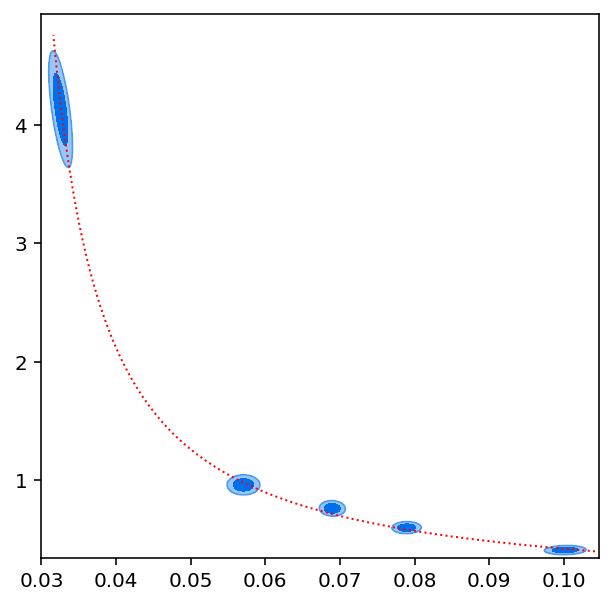

In [26]:
BAO_data_path='../BAO_data/'
BAO_datasets= ['DR16_LRG_ELG','DR12_consensus','DR14_lya_qsar']

g = plots.getSubplotPlotter(subplot_size=5)
for BAO_dataset in BAO_datasets:
    zeff = np.loadtxt(BAO_data_path+BAO_dataset+'_zeff.txt')
    if zeff.size==1:
        means = np.loadtxt(BAO_data_path+BAO_dataset+'_measurement.txt') # in theta, deltaz
        Cov = np.loadtxt(BAO_data_path+BAO_dataset+'_C.txt')
        means2 = np.array([(means[0]**2*means[1]/zeff)**(1/3)  , means[1]/means[0]])    # in rdH0/fV, F_AP
        J = np.array([[2/3*means2[0]/means[0],1/3*means2[0]/means[1]],[-means[1]/means[0]**2,1/means[0]]])
        Cov2= np.dot(np.dot(J,Cov),np.transpose(J))
        g.add_2d_covariance(means2, Cov2,filled=True)
    else:
        means_all= np.loadtxt(BAO_data_path+BAO_dataset+'_measurement.txt')
        Cov_all = np.loadtxt(BAO_data_path+BAO_dataset+'_C.txt')
        for i in np.arange(zeff.size):
            means = means_all[2*i:2*i+2]
            Cov = Cov_all[2*i:2*i+2,2*i:2*i+2]
            means2 = np.array([(means[0]**2*means[1]/zeff[i])**(1/3)  , means[1]/means[0]])    # in rdH0/fV, F_AP
            J = np.array([[2/3*means2[0]/means[0],1/3*means2[0]/means[1]],[-means[1]/means[0]**2,1/means[0]]])
            Cov2= np.dot(np.dot(J,Cov),np.transpose(J))
            g.add_2d_covariance(means2, Cov2,filled=True)

            
z_range = np.linspace(0.36,2.4,200)
rdH0_fV=[]
FAP=[]
Om_fid=0.3153
for z in z_range:
    rdH0_fV.append(147.09*67.36/300000/BG.fV_LCDM(z,Om_fid))
    FAP.append(BG.Ez_flat_LCDM(z,Om_fid)*BG.fC_LCDM(z,Om_fid))
g.subplots[0,0].plot(rdH0_fV, FAP,'r:',lw=1)